<img align="right" src="../../additional_data/banner_siegel.png" style="width:1100px;">

# Image Processing Basics with Numpy and Matplotlib

* [**Sign up to the JupyterHub**](https://www.phenocube.org/) to run this notebook interactively from your browser
* **Compatibility:** Notebook currently compatible with the Open Data Cube environments of the University of Wuerzburg
* **Prerequisites**: There is no prerequisite learning required.


## Background
Numpy is a Python library containing multidimensional array and matrix data structures, which allows efficient operations. It supports a wide variety of numerical types, such as integer or Boolean (True or False). To understand numpy array, it is a grid of elements of the same type that can be indexed in various ways. Numpy acts as the basic framework for representating a satellite raster image, which we frequently encounters in this eo2cube tutorial. It is built upon by Xarray library for more advanced features and better fit to scientific data. To get more information about the `numpy` package, visit the [offical documentation website](https://numpy.org/doc/stable/user/absolute_beginners.html).


## Description

This notebook introduces users to the `numpy` library within the datacube environment. It aims to explain the structure of numpy array and its connection to raster images. Within this notebook the following topics are covered:

* Introduction of numpy array's dimensionality 
* Indexing and slicing of numpy array
* Application of linear algebra operations on n-dimensional numpy array
***

## Setting up
### Load packages
Loading packages is the necessary step for the following demonstrations.

In [61]:
#import datacube
#from odc.ui import with_ui_cbk
#import cv2 as cv
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

sys.path.append("../../../../Scripts") #this need to be the path to the Scripts folder
from DEAPlotting import display_map, rgb #this line allows us to use specific functions written in another script

%matplotlib inline 
#this line allows plotting within the JupyterLab

## List v.s. Numpy Array

In [298]:
list = [0,0,0]
array = np.array(list)

print(type(list),type(array))

<class 'list'> <class 'numpy.ndarray'>


In [299]:
arr1d = np.array([0,0,0])
arr2d = np.array([[0,0,0],[1,1,1]])
arr3d = np.array([[[0,0,0],[1,1,1]],[[0,0,0],[1,1,1]]])

print(arr1d.shape, arr2d.shape, arr3d.shape)
print(arr1d.ndim, arr2d.ndim, arr3d.ndim)

(3,) (2, 3) (2, 2, 3)
1 2 3


## Introduction to Matplotlib
#### matplotlib.pyplot

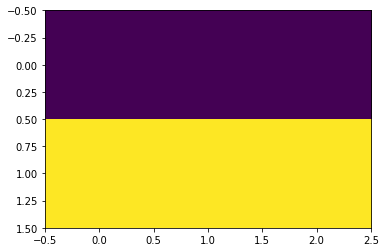

In [319]:
plt.imshow(arr2d)

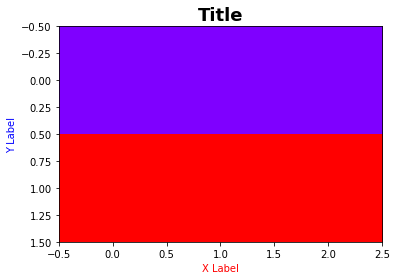

In [337]:
plt.imshow(arr2d, cmap="rainbow")
plt.title("Title", fontsize=18, fontweight="bold")
plt.xlabel("X Label", fontsize=10, color="red")
plt.ylabel("Y Label", fontsize=10, color="blue")
plt.tight_layout()
plt.show()
#https://matplotlib.org/stable/tutorials/text/text_props.html

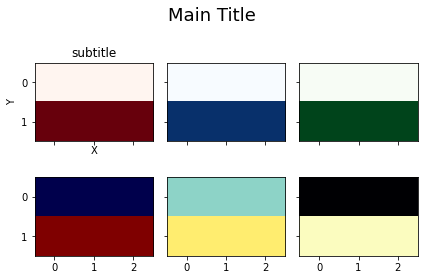

In [371]:
figure, ax0 = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(6,4))

ax0[0,0].imshow(arr2d, cmap="Reds")
ax0[0,1].imshow(arr2d, cmap="Blues")
ax0[0,2].imshow(arr2d, cmap="Greens")
ax0[1,0].imshow(arr2d, cmap="seismic")
ax0[1,1].imshow(arr2d, cmap="Set3")
ax0[1,2].imshow(arr2d, cmap="magma")

ax0[0,0].set_xlabel('X')
ax0[0,0].set_ylabel('Y')
ax0[0,0].set_title('subtitle')

figure.suptitle("Main Title", fontsize=18)

plt.tight_layout()
plt.show()

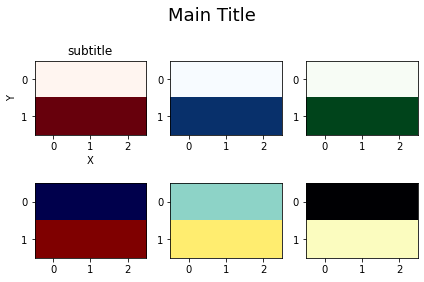

In [384]:
figure1, ax01 = plt.subplots(sharex=True, sharey=True, figsize=(6,4))

plt.subplot(2,3,1)
plt.imshow(arr2d, cmap="Reds")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('subtitle')

plt.subplot(2,3,2)
plt.imshow(arr2d, cmap="Blues")

plt.subplot(2,3,3)
plt.imshow(arr2d, cmap="Greens")

plt.subplot(2,3,4)
plt.imshow(arr2d, cmap="seismic")

plt.subplot(2,3,5)
plt.imshow(arr2d, cmap="Set3")

plt.subplot(2,3,6)
plt.imshow(arr2d, cmap="magma")

figure1.suptitle("Main Title", fontsize=18)

plt.tight_layout()
plt.show()

## Image processing with Numpy and Matplotlib

In [59]:
#img = cv2.imread("MountFuji.jpg")
img = imread('MountFuji.jpg')
img

array([[[ 68,  82,  59],
        [ 86, 101,  78],
        [ 86, 106,  81],
        ...,
        [ 52,  73,  54],
        [ 37,  58,  39],
        [ 36,  58,  37]],

       [[ 73,  87,  64],
        [ 88, 103,  80],
        [ 78,  98,  71],
        ...,
        [ 62,  81,  62],
        [ 61,  80,  60],
        [ 48,  67,  47]],

       [[ 80,  93,  73],
        [ 97, 111,  88],
        [ 99, 117,  91],
        ...,
        [ 72,  91,  71],
        [ 89, 106,  87],
        [ 59,  78,  56]],

       ...,

       [[ 45,  73,  58],
        [ 46,  74,  59],
        [ 48,  79,  63],
        ...,
        [ 10,  20,  12],
        [ 59,  82,  66],
        [ 36,  68,  44]],

       [[ 50,  78,  63],
        [ 59,  87,  72],
        [ 56,  84,  69],
        ...,
        [ 82,  98,  87],
        [ 69,  96,  77],
        [ 31,  65,  40]],

       [[ 52,  80,  65],
        [ 53,  81,  66],
        [ 53,  84,  68],
        ...,
        [ 49,  74,  55],
        [ 35,  64,  42],
        [ 28,  60,  37]]

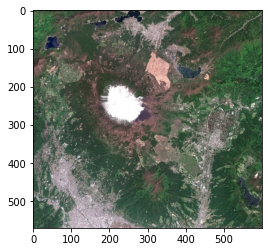

In [386]:
plt.imshow(img)

In [55]:
type(img)

numpy.ndarray

In [8]:
img.shape

(571, 600, 3)

In [148]:
Red = img[:,:,0]
Green = img[:,:,1]
Blue = img[:,:,2]

In [92]:
print("The mean pixel values for red color is: ",round(Red.mean(),1),"\nThe mean pixel values for green color is: ", round(Green.mean(),1),"\nThe mean pixel values for blue color is: ", round(Blue.mean(),1), "\nThe number of pixel is: ", len(img)*len(img[0]))

The mean pixel values for red color is:  89.6 
The mean pixel values for green color is:  99.2 
The mean pixel values for blue color is:  85.2 
The number of pixel is:  342600


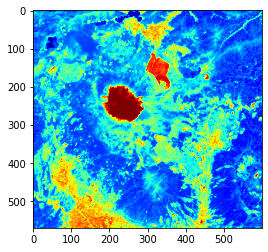

In [47]:
plt.imshow(Red, cmap = "jet") #The intensity of red color

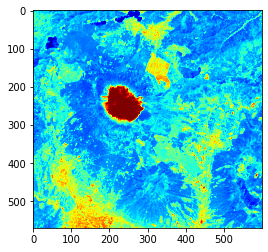

In [46]:
plt.imshow(Green, cmap = "jet") #The intensity of green color

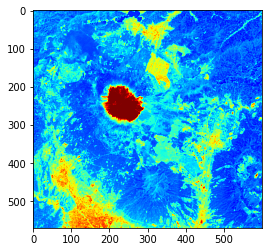

In [48]:
plt.imshow(Blue, cmap = "jet") #The intensity of blue color

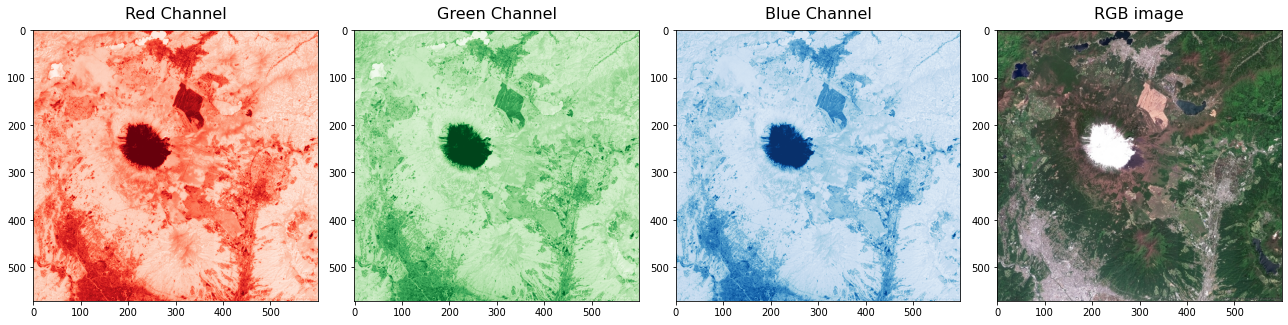

In [36]:
f, ax = plt.subplots(figsize=(18, 12))
plt.subplot(141)
plt.imshow(Red, cmap = "Reds")
plt.title('Red Channel', y=1.02, fontsize=16)

plt.subplot(142)
plt.imshow(Green, cmap = "Greens")
plt.title('Green Channel', y=1.02, fontsize=16)

plt.subplot(143)
plt.imshow(Blue, cmap = "Blues")
plt.title('Blue Channel', y=1.02, fontsize=16)

plt.subplot(144)
plt.imshow(img)
plt.title('RGB image', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [99]:
img[0,0,:]

array([68, 82, 59], dtype=uint8)

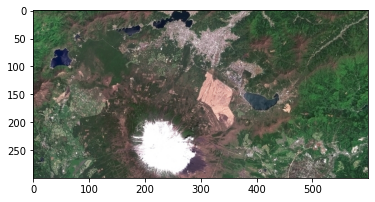

In [29]:
upper_half = img[0:300,:,:]
plt.imshow(upper_half)

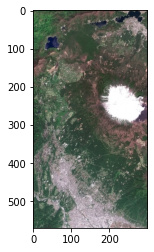

In [28]:
left_half = img[:,0:300,:]
plt.imshow(left_half)

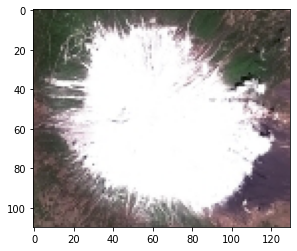

In [53]:
peak = img[190:300,170:300,:]
plt.imshow(peak)

In [227]:
reshaped = img[190:300,170:300,:].reshape((100,143,3))

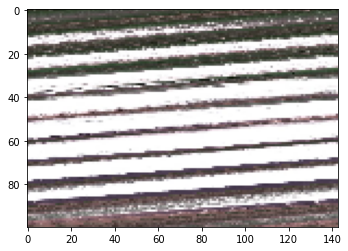

In [228]:
plt.imshow(reshaped)

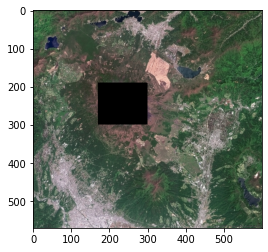

In [104]:
img2 = img.copy()
img2[190:300,170:300,:] = np.zeros(img[190:300,170:300,:].shape)
plt.imshow(img2)

In [287]:
arr1 = img[1:20,1:20,0]
arr2 = img[1:20,1:20,1]

addition = arr1 + arr2 
#equivalent to np.add(arr1, arr2)

substraction = arr1 - arr2 
#equivalent to np.substract(arr1, arr2)

product = arr1*arr2 
# equivalent to np.multiply(arr1, arr2)

division = arr1/arr2 
#equivalent to np.divide(arr1,arr2)

print("Head of 1st array: ",arr1[0, 0:5],"\nHead of 2nd array: ", arr2[0, 0:5],"\n\nAddition: ", addition[0, 0:5])
print("Substraction: ",substraction[0, 0:5],"\nProduct: ", multiply[0, 0:5],"\nDivision: ", division[0, 0:5])


Head of 1st array:  [88 78 76 98 65] 
Head of 2nd array:  [103  98 101 127  94] 

Addition:  [191 176 177 225 159]
Substraction:  [241 236 231 227 227] 
Product:  [104 220 252 158 222] 
Division:  [0.85436893 0.79591837 0.75247525 0.77165354 0.69148936]


Text(0, 0.5, 'Latitude')

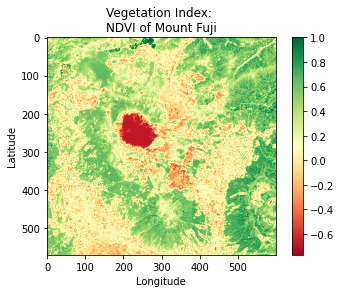

In [198]:
fake_NIR = Green*0.2 - Blue*2 + 250

ndvi = (fake_NIR - Red)/(fake_NIR + Red)

plt.imshow(ndvi, cmap = "RdYlGn")
plt.colorbar()
plt.title("Vegetation Index: \nNDVI of Mount Fuji")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [204]:
ndvi.shape

(571, 600)

In [205]:
ndvi

array([[ 0.45205479,  0.21360255,  0.19213974, ...,  0.5930824 ,
         0.76030681,  0.7731569 ],
       [ 0.39121756,  0.18542337,  0.31818182, ...,  0.47970864,
         0.4974359 ,  0.64946446],
       [ 0.2864638 ,  0.06181015,  0.02466368, ...,  0.35553169,
         0.11595867,  0.53140578],
       ...,
       [ 0.63656388,  0.62389381,  0.59044369, ..., -0.04958678,
         0.48180816,  0.75951904],
       [ 0.57207207,  0.44835681,  0.49074074, ...,  0.15458937,
         0.33797909,  0.81188119],
       [ 0.54545455,  0.53196347,  0.52270081, ...,  0.61418144,
         0.77205154,  0.84313725]])

Text(0, 0.5, 'Latitude')

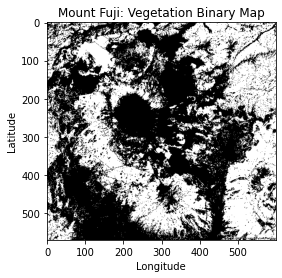

In [203]:
plt.imshow(ndvi > 0.4, cmap = "gist_gray")
plt.title("Mount Fuji: Vegetation Binary Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

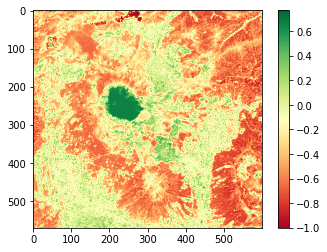

In [238]:
plt.imshow(np.negative(ndvi), cmap = "RdYlGn")
plt.colorbar()

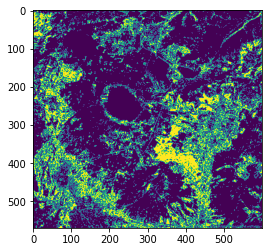

In [283]:
condition = np.logical_and(Green > 100, Red < 150)
plt.imshow(condition)

In [267]:
zeros = np.zeros((10,10))
ones = np.ones((10,10))
arange = np.multiply(np.arange(100).reshape((10,10)),0.01)
#np.linspace(0,99,100, dtype = "int") = np.arange(100)

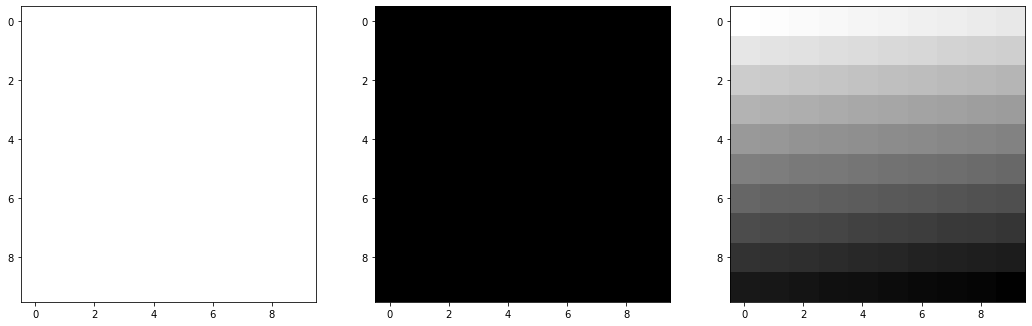

In [269]:
f2, ax2 = plt.subplots(1,3,figsize=(18, 12))
ax2[0].imshow(zeros, cmap="binary", vmin = 0, vmax = 1)
ax2[1].imshow(ones, cmap="binary", vmin = 0, vmax = 1)
ax2[2].imshow(arange, cmap="binary", vmin = 0, vmax = 1)

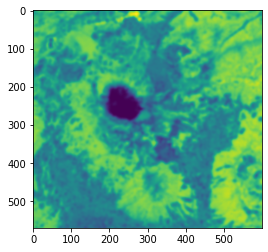

In [209]:
import scipy as sp
import scipy.ndimage

ndvi_smooth = sp.ndimage.filters.gaussian_filter(ndvi, [3,3])
plt.imshow(ndvi_smooth)

## Recommended next steps

To continue working through the notebooks in this beginner's guide, the following notebooks are designed to be worked through in the following order:

1. [Jupyter Notebook](01_jupyter_introduction.ipynb)
2. [eo2cube](02_eo2cube_introduction.ipynb)
3. [Loading Data](03_data_lookup_and_loading.ipynb)
4. [xarray basics](04_xarrayI_data_structure.ipynb)
5. [Advanced xarrays operations](05_xarrayII.ipynb)
6. [Plotting data](06_plotting_basics.ipynb)
7. [Spatial analysis](07_basic_analysis.ipynb)
8. [Parallel processing with Dask](08_parallel_processing_with_dask.ipynb)

Once you have worked through the beginner's guide, you can join advanced users by exploring:

* The "DEA datasets" directory in the repository, where you can explore DEA products in depth.
* The "Frequently used code" directory, which contains a recipe book of common techniques and methods for analysing DEA data.
* The "Real-world examples" directory, which provides more complex workflows and analysis case studies.

***
## Additional information

This notebook for the usage of Jupyter Notebook of the [Department of Remote Sensing](http://remote-sensing.org/), [University of Wuerzburg](https://www.uni-wuerzburg.de/startseite/), is partly adapted from [Earth Lab](https://www.earthdatascience.org/courses/intro-to-earth-data-science/), published using the CC BY-NC-ND License 4.0. Thanks!

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 


**Contact:** If you would like to report an issue with this notebook, you can file one on [Github](https://github.com).

**Last modified:** April 2021